<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |  **100**
|--------------------------|--------
|  **Weight**              |  **20% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Friday, May 24**
|  **Submission mode**     |  **Electronic, Using GitLab <br/> One submission per group**
|  **Estimated time**      |  **20 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-2.ipynb` and any other additional files that you may have created / hyperlinked in this notebook, as part of your submission by pushing it to your forked GitLab repository. You need to add your group details below. Make sure your group works on and submits only have one fork of the assignment repository. 


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted.

<span style="color:blue">
    
### Group Number :  2420_A2_Grp9

### Student IDs: u6380075, u6352696 and u6742441

</span>

## Introduction



In [1]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL

from IPython.display import Math
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as skm

***

## Section A - Database Management (15 Marks)

You have been given the following database containing 15 tables relating to **DVD Movie Rentals**. The data contained in these tables is as follows -

|  **Table**               |  **Data Description**      |
|--------------------------|----------------------------|
|  actor                   |  actors data including first name and last name     |
|  film                    |  films data such as title, release year, length, rating, etc      |
|  film_actor              |  stores the relationships between films and actors |
|  category                |  stores film’s categories data |
|  film_category           |  stores the relationships between films and categories | 
|  store                   |  store data including manager staff and address |
|  inventory               |  stores inventory data |
|  rental                  |  stores rental data |
|  payment                 |  stores customer's payments |
|  staff                   |  stores staff data |
|  customer                |  stores customer data |
|  address                 |  address data for staff and customers |
|  city                    |  stores city data |
|  country                 |  stores country data |

Visualizing the relations between these tables can be aided by looking at the below **E-R Diagram**.

<img src='./dvd_rental_er.png'>

Based on your understanding of the relationships between these tables, answer the following questions by writing SQL queries to get the required data rows from the database and display them as a **Pandas dataframe**. 

***
#### **NOTE**:
For the following questions, in the CSIT labs you will be able to connect directly to the database using the below code within the notebook. From outside of the CSIT labs, you will need to perform SQL queries in your terminal by using [partch](https://cs.anu.edu.au/docs/student-computing-environment/linuxlabs/remoteaccess/#connectingtopartch3). Once you have the correct query, you may just fill in the boxes below.

**Partch Instructions**
1. Connect to partch as per the above hyperlink
2. In your terminal, enter `psql` to access the sql database
3. Enter `\c dvdrental` to ensure you are accessing the assignment database (or simply specify dvdrental when connecting to the database server -- `psql dvdrental`).
4. (Sanity Check) Enter `SELECT * FROM actor;` . If you receive the first row to be "Penelope Guiness", you should be good to go !
***

In [3]:
# Connect using psycopg2
conn = psycopg2.connect(host="/var/run/postgresql", database="dvdrental")

# Activate connection cursor
curr = conn.cursor()

In [4]:
def execute_sql(query):
    # Select table and display
    curr.execute(query)

    # Fetches all the rows from the result of the query
    rows = curr.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in curr.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_result

### 1. Write an SQL query to determine the total sales from the rentals of the film 'Affair Prejudice' from the rental store with `store_id = 2`. Your query should result in a single column called `Total Rental Cost` with the value of the total cost of all these rentals.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [5]:
# YOUR QUERY HERE

query = "SELECT sum(p.amount) \
FROM  film AS f \
INNER JOIN inventory AS i ON f.film_id = i.film_id \
INNER JOIN rental AS r ON i.inventory_id = r.inventory_id \
INNER JOIN payment AS p ON p.rental_id = r.rental_id \
WHERE i.store_id = 2 \
AND f.title = 'Affair Prejudice' \
;"

execute_sql(query)

,sum
0,33.91


### 2. Write an SQL query to retrieve the names of all customers who rented the film ‘Affair Prejudice’ from the store with `store_id = 1`. The result of your query should display each customer's first name and last name. 
<span style= 'float: right;'><b>[3 marks]</b></span>

In [6]:
# YOUR QUERY HERE

query = "SELECT c.first_name, c.last_name \
FROM  film AS f \
INNER JOIN inventory AS i ON f.film_id = i.film_id \
INNER JOIN rental AS r ON i.inventory_id = r.inventory_id \
INNER JOIN customer AS c ON c.customer_id = r.customer_id \
WHERE i.store_id = 1 \
AND f.title = 'Affair Prejudice' \
;"

execute_sql(query)


,first_name,last_name
0,Vivian,Ruiz
1,Nina,Soto
2,Jordan,Archuleta
3,Danielle,Daniels
4,Sue,Peters
5,Michael,Silverman
6,Jeff,East
7,Megan,Palmer
8,Eleanor,Hunt
9,Natalie,Meyer


### 3. Write an SQL query to retrieve the names of all those customers who have a total of more than 100 dollars in recorded payments. Your query's result should include each customer's first name, last name and customer ID. 
<span style= 'float: right;'><b>[4 marks]</b></span>

In [7]:
# YOUR QUERY HERE

query = "SELECT c.first_name, c.last_name, c.customer_id \
FROM (SELECT SUM(p.amount), p.customer_id \
FROM payment as p \
GROUP BY  p.customer_id \
HAVING SUM(p.amount) > 100) AS sums, \
customer AS c \
WHERE c.customer_id = sums.customer_id;"

execute_sql(query)

,first_name,last_name,customer_id
0,Mary,Smith,1
1,Patricia,Johnson,2
2,Linda,Williams,3
3,Elizabeth,Brown,5
4,Maria,Miller,7
5,Karen,Jackson,13
6,Helen,Harris,15
7,Sandra,Martin,16
8,Sharon,Robinson,20
9,Michelle,Clark,21


### 4. Write an SQL query to retrieve the names of all customers who have rented the movie ‘Angels Life’ from *both* stores with `store_id = 1` and `store_id = 2`. Your query's result should include each customer's first name, last name and customer ID.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [8]:
# YOUR QUERY HERE

query = "SELECT c.first_name, c.last_name, c.customer_id \
FROM  film AS f \
INNER JOIN inventory AS i ON f.film_id = i.film_id \
INNER JOIN rental AS r ON i.inventory_id = r.inventory_id \
INNER JOIN customer AS c ON c.customer_id = r.customer_id \
WHERE (i.store_id = 1) \
AND f.title = 'Angels Life' \
INTERSECT \
SELECT c.first_name, c.last_name, c.customer_id \
FROM  film AS f \
INNER JOIN inventory AS i ON f.film_id = i.film_id \
INNER JOIN rental AS r ON i.inventory_id = r.inventory_id \
INNER JOIN customer AS c ON c.customer_id = r.customer_id \
WHERE (i.store_id = 2) \
AND f.title = 'Angels Life' \
;"

execute_sql(query)

,first_name,last_name,customer_id
0,Cathy,Spencer,163


***

## Section B - Data Acquisition (20 Marks)

In this section, you need to read and import the data from the database into Python and make it ready to be used by your machine learning algorithms in the next section. **Your task here is to load the required columns from the various appropriate tables in the database to fuel the data required to train your machine learning models in the next section.** You can load the required data into one or more Pandas dataframes, to suit the the needs of different Machine Learning models in Section C. 

If you fail to do so, or an error in the previous section is preventing you from doing so, we can provide you with a **CSV of the required data**. If you choose to use this CSV, you will not receive any marks for this section, but you'll be able to do the following section without having to spend time on this section.  

<span style='color:red;'><b>Note:</b> While you are provided the .csv files to use for development of the later questions at home, you must submit a copy of the code that can read the database to receive marks for this section.</span>
<span style= 'float: right;'><b>[20 marks]</b></span>

In [9]:
# YOUR CODE HERE

actor = "SELECT * FROM actor;"
actor_data = execute_sql(actor)

film = "SELECT * FROM film;"
film_data = execute_sql(film)

film_actor = "SELECT * FROM film_actor;"
film_actor_data = execute_sql(film_actor)

category = "SELECT * FROM category;"
category_data = execute_sql(category)

film_category = "SELECT * FROM film_category;"
film_category_data =execute_sql(film_category)

store = "SELECT * FROM store;"
store_data =execute_sql(store)

inventory = "SELECT * FROM inventory;"
inventory_data =execute_sql(inventory)

rental = "SELECT * FROM rental;"
rental_data =execute_sql(rental)

payment = "SELECT * FROM payment;"
payment_data =execute_sql(payment)

staff = "SELECT * FROM staff;"
staff_data =execute_sql(staff)

customer = "SELECT * FROM customer;"
customer_data =execute_sql(customer)

address = "SELECT * FROM address;"
address_data =execute_sql(address)

city = "SELECT * FROM city;"
city_data =execute_sql(city)

country = "SELECT * FROM country;"
country_data =execute_sql(country)

language = "SELECT * FROM language;"
language_data =execute_sql(language)

#Updating data types to float
film_data['rental_rate'] = film_data['rental_rate'].astype(float)
film_data['replacement_cost'] = film_data['replacement_cost'].astype(float)
payment_data['amount'] = payment_data['amount'].astype(float)


In [10]:
#Data frame for Section C Part 1
#This data frame was not used in Section C as the output of the algorithms differed when using the SQLed joins 
#data frame as opposed to the Pandas joined data frames. Both the data frames looked the same and retrieved the 
#same data. We posted about this issue on the forum: 
#https://discourse.cecs.anu.edu.au/t/csv-vs-sql-dataframes-differences/2057

query = "SELECT c.customer_id, f.rating,f.rental_rate,f.replacement_cost,  fc.category_id \
FROM  customer AS c \
INNER JOIN rental AS r ON c.customer_id = r.customer_id \
INNER JOIN inventory AS i ON i.inventory_id = r.inventory_id \
INNER JOIN film AS f ON f.film_id = i.film_id \
INNER JOIN film_category AS fc ON f.film_id = fc.film_id \
;"

clustering_df =  execute_sql(query)
#Updating data types to float
clustering_df['rental_rate'] = clustering_df['rental_rate'].astype(float)
clustering_df['replacement_cost'] = clustering_df['replacement_cost'].astype(float)

# display("clustering_df")
# display(clustering_df)
# display(clustering_df.info())
# display(clustering_df.describe())

In [11]:
#Data frame for Section C Part 2
#This data frame was not used in Section C as the output of the algorithms differed when using the SQLed joins 
#data frame as opposed to the Pandas joined data frames. Both the data frames looked the same and retrieved the 
#same data. We posted about this issue on the forum: 
#https://discourse.cecs.anu.edu.au/t/csv-vs-sql-dataframes-differences/2057

query = "SELECT f.rental_duration, f.rental_rate, f.length, f.replacement_cost, f.rating,     \
fc.film_id, fc.category_id \
FROM  film AS f \
INNER JOIN film_category AS fc ON f.film_id = fc.film_id \
;"

film_cat_df =  execute_sql(query)
film_cat_df = film_cat_df.set_index('film_id')

#Updating data types to float
film_cat_df['rental_rate'] = film_cat_df['rental_rate'].astype(float)
film_cat_df['replacement_cost'] = film_cat_df['replacement_cost'].astype(float)


# display("film_cat_df")
# display(film_cat_df.head(5))
# display(film_cat_df.info())
# display(film_cat_df.describe())

***

## Section C - Machine Learning (55 Marks)
<span style='color:purple;'><b>Note:</b> We have provided the .csv outputs for the files to use in these questions if you are working on the assignment at home. Please note if any of these questions refer to those csvs and not the data from Section B in your submitted assignment, you will receive no marks for Section B.</span>

In [12]:
## Import csv files for home development here as necessary. 
homework_actor = pd.read_csv("data/dvd_rental/actor.csv")
# read in other csvs as necessary.

### Part 1 - Clustering (25 Marks)

### Part 1.1 - Clustering Short Answers (8 Marks)

#### 1. Can a Decision Tree be used to perform clustering? If so, explain how. If not, provide a counterexample showing how it is not suitable for the function.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>
Clustering can not be performed using a decision tree as a decision tree is created using entropy and information gain which is calculated using features and a target then the tree is split according to that. 

The decision tree is supervised learning as it uses a target to train the model whereas clustering is unsupervised learning which uses features and does not use a target, instead it looks for patterns in the data to form the clusters. 

Since the data used in unsupervised learning does not include a target, a supervised learning algorithm (such as a decision tree) cannot be used.


#### 2. Will a K-means Clustering Algorithm generate the same results each time? Provide examples on how this may or may not be the case.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>
A K-means clustering algorithm will not generate the same results every time because, in the algorithm, we basically choose the number of clusters for the algorithm and random centroids are assigned to those clusters. Then, the centroids will be changed according to the points nearby and different points will acquire different clusters and centroids will change accordingly. For example, in the figure 1, it can be clearly seen that there are 3 clusters and centroids point are assigned to each cluster. So, in this, for, getting the optimal clusters, the centroids will check it's near point and will find the distance between them using Euclidean distance. So, if the point assigned to the cluster doesn't have the minimum distance from the centroids as compared to other centroids, then points will be assigned to the cluster whose centroid distance is minimum and due to which the cluster centroid will change which is shown in the figure 2. So, we can deduce that the K-means cannot generate the same results every time.

Reference for graphs : (Clustering Slides on course website)

Figure 1:

<img src='./Reassign_clusters.jpg'>
<br>
Figure 2:  

<img src='./Reassign_clusters_again.jpg'>

### Part 1.2 - K-Means Clustering Implementation (17 Marks)

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  From the dataset acquired after completing **Section - B**, implement a `K-Means clustering algorithm` to help you cluster the dataset of customers on the basis of the movies they have rented from the DVD rental stores. Various attributes related to the movies such `rating`, `year`, `rental_rate` and `year` may be useful for this exercise. Another interesting attribute that you can look at is the `fulltext` of the movie. In terms of the customer details, you can look at which movies a customer has rented, and the total number of movies rented by a customer. After you've prepared your learning model, plot a **visualization** showing the different clusters. If you have used more than 2 features for your clustering, you are still expected to provide a visualization by reducing the dimensions into a 2D graph.

It's upto you to decide how many clusters you would like to incorporate in your model. You are expected to justify all aspects of your implementation including the reasoning behind the choice of **the number of clusters** and **number of iterations** in your model. 

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution.</span>
<span style= 'float: right;'><b>[15 marks total: 10 marks model, 5 marks justification & commentary]</b></span>

Centroids for this dataset are:
 [[-4.53377023 -0.19596994]
 [ 6.2858647   0.27170334]]


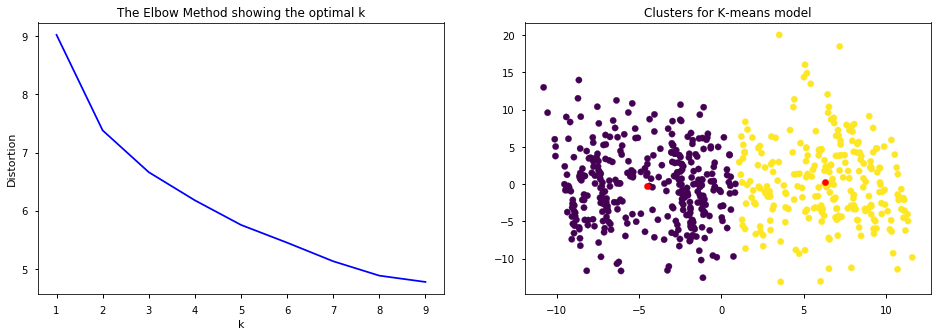

Cluster 0


,category_id,count,rating,rental_rate,replacement_cost,clusters
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.0
mean,9.741379,27.005747,2.379310,2.926782,25.133678,0.0
std,4.688180,4.898388,1.327965,1.693018,3.102855,0.0
min,1.000000,15.000000,0.000000,0.990000,19.990000,0.0
25%,6.000000,23.000000,1.000000,0.990000,22.990000,0.0
50%,10.000000,27.000000,3.000000,2.990000,24.990000,0.0
75%,14.000000,30.000000,4.000000,4.990000,27.990000,0.0
max,16.000000,42.000000,4.000000,4.990000,29.990000,0.0



Cluster 1


,category_id,count,rating,rental_rate,replacement_cost,clusters
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.0
mean,10.163347,26.478088,2.478088,3.029841,14.324661,1.0
std,4.639096,5.385399,1.220868,1.729279,2.792768,0.0
min,1.000000,12.000000,0.000000,0.990000,9.990000,1.0
25%,7.000000,23.000000,1.500000,0.990000,11.990000,1.0
50%,11.000000,26.000000,3.000000,2.990000,13.990000,1.0
75%,14.000000,30.000000,3.000000,4.990000,16.990000,1.0
max,16.000000,46.000000,4.000000,4.990000,19.990000,1.0


In [13]:
# YOUR CODE HERE

df = film_data
df = df[df.columns.difference(['title','description','release_year','language_id','last_update','fulltext'])]
# Converting string and assigning the integer values to it.
le = LabelEncoder()
le.fit(df['rating'].unique())
df['rating'] = le.transform(df['rating'])

# Join the datasets
new_data1 = pd.merge(inventory_data,df, on = "film_id" , how= "inner")
new_data2 = pd.merge(rental_data,new_data1, on = "inventory_id", how = "inner")
df1 = new_data2[new_data2.columns.difference(['rental_id','return_date','rental_date','last_update_x','last_update_y','staff_id','store_id','inventory_id'])]
df2 = pd.merge(df1, film_category_data, on='film_id', how='inner') # retrieving the film categories
df2 = df2.drop('last_update', axis=1) # getting rid of unnecessary columns
df2 = df2.drop('film_id', axis=1) # getting rid of unnecessary columns

# Converting the categorical data and assigning the intgeral values to it using label encoder.
count = df1.groupby(['customer_id']).size().reset_index(name='count')
df2 =df2.groupby('customer_id').agg(lambda x:x.value_counts().index[0])
df2 = df2.join(count.set_index('customer_id'))
df2 = df2[df2.columns.difference(['special_features','length','rental_duration'])]

# K means Clustering used on the dataset
pca = PCA(n_components=2)
k = pca.fit_transform(df2)
kmeans = KMeans(n_clusters=2,max_iter=10)
kmeans.fit(k)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("Centroids for this dataset are:\n",centroids)
plt.figure(figsize=(16,11))
plt.subplot(2,2,2)
plt.title("Clusters for K-means model")
plt.scatter(k[:,0],k[:,1], c= kmeans.labels_.astype(float), s=40, alpha=1.0)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=40)
#----------------------------------------------------------------------------------------------------
#Reference - https://pythonprogramminglanguage.com/kmeans-elbow-method/  (--- All code under ---- is referenced)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df2)
    kmeanModel.fit(df2)
    distortions.append(sum(np.min(cdist(df2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df2.shape[0])

# Plot the elbow
plt.subplot(2,2,1)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#-----------------------------------------------------------------------------------------------------

# Labels to the clusters and identifying the characterstics of the each clusters using min and max of each cluster
df2['clusters'] = labels
df3 = df2[df2['clusters'] == 1]
df4 = df2[df2['clusters'] == 0]

print ("Cluster 0")
display(df4.describe())
print ("\nCluster 1")
display(df3.describe())

#### <span style="color:blue"> Your justifications & commentary here: </span>
#### Included features

The features used for this clustering are rating, rental_rate, category_id, replacement_cost and count (count of films each customer has rented). Rating is added to the data frame because it helps in defining the clusters but just to an extent. This happens as the data provided is bad. 

In the 0th cluster, the mean of rating is 2.37 whereas the mean rating of the 1st cluster is 2.47 because of which we can say that the people of the 1st cluster are a little more inclined towards the age restricted movies. 

Replacement cost is basically the cost of replacing the DVD. This plays a major role in the clusters. It does provide a really good definition of the clusters as we can infer from the data frame, that the 0th cluster customers choose the DVD whose replacement cost is greater than or equal to 19.99 whereas the 1st cluster contains the customers who chose the DVD having the replacement cost less than or equal to 19.99. 

Category id defines the movie type people like to watch due to which it has been added to the cluster. When the category id was not included in the data frame the clusters produced scattered points rather than an organised cluster. 

Mean count of the movies rented by the customers in the 0th cluster is 26.47 whereas the mean count of movies rented by customers in the 1st cluster is 27.00 by which we can say that the cluster 1 customers rent more movies. 

The reason for adding the rental rate in the data frame is that the 0th mean rental rate is higher than that of the 1st cluster due to which it gives the characteristics to the clusters to some extent. Features like rental rate, category_id, count and the rating do not give much definition to the cluster. The reason for this is that the data provided is not good enough for k-means clustering as it doesn't help much in defining the clusters except the few features like replacement cost. 

#### Features which were not included:

Special features were not used for clustering as they did not help in defining the clusters and moreover when tried running the data frame using the SQL, it caused many errors. 

The length was not included, as it scattered the cluster too much rather than creating organised clusters. 

The reason for excluding the title, description and fulltext of the movie is that these are all unique and unique values won't help in the cluster at all as every point would be different.

Year was also excluded as it is constant and it won’t contribute to clustering. 

Language id and last update dates are the same for every data point in the data so it won't help in k-means clustering, therefore they were discarded from the final data frame used for clustering. 

Rental_id, inventory_id, film_id, customer_id attributes were used for joining the tables and were used as a primary key but after the tables were joined and aggregated, the ids were discarded from the final data frame as the ids are unique and cannot be used in clustering because if used, it will create random or scattered points. 

Return_date and Rental date were discarded as the data format provided was incompatible with clustering.

#### Cluster analysis

The good clusters are those clusters which can be easily distinguished and moreover, have a distinct characteristic. So, the reason for choosing 2 clusters was that the features used in the data frame easily helped in distinguishing the clusters if the number of clusters chosen was 2. 

If a different number of clusters was used, then the clusters formed were overlapping and moreover, the features didn’t help in distinguishing the clusters. 

The Elbow method was also used to determine the number of clusters however it did not provide much help as the method produced no elbow bends as seen above in the plot. The ideal outcome would be to see 1 distinct elbow bend at the x value which represents the optimum cluster number. Instead of having a proper bend, the produced graph is hyperbolic. The number of iterations were found using a trial and error method, values were tested until stable clusters and centroids were produced. The ideal number of iterations for this model is 10.

The method for finding the clusters and number of iterations can be defined as brute-force. The optimal number of clusters and iterations cannot be easily identified any other way as the k-means algorithm is NP-Hard in which the algorithm is non deterministic.

#### What do your resulting clusters represent?  Explain the distinguishing characteristics of each cluster. 
<span style= 'float: right;'><b>[2 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>
We can clearly infer from the clusters that 0th cluster has replacement cost less than than 19.99 and the 1st cluster contains all the data points having replacement cost greater than 19.99. 

Moreover the mean rental rate and mean rating is higher in 0th cluster than the 1st cluster and mean count of movies rented in 1st cluster is higher than that of the 0th cluster. The main factor which segregates one cluster from other is replacement cost.

In conclusion, cluster 0 contains customers who prefer mature movies which are more expensive to rent however cheaper to replace and customers in cluster 1 prefer more general viewing movies which are cheaper to rent and more expensive to replace. 

### Part 2 - Classification (30 Marks)

The rental company has decided that they want to use simple machine learning to allocate price tags to their movies. The tags are as follows:


|  **Classification**      |  **Requirements**        |
|--------------------------|------------------------- |
|  Cheap                   |  Rental Rate is 0.99   |
|  Moderate                |  Rental Rate is 2.99   |
|  Expensive               |  Rental Rate is 4.99  |


**Your task is to implement a `Classification Algorithm` (such as K-Nearest Neighbours) that can predict the `Price Label` of a movie**. You are required to perform the following tasks:

1. Create useable dataset/s by manually determining the 'truth values' for existing data (where the rating is within the classification system defined above)
2. Implement an algorithm that can predict the classification as per the above classifications.
3. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.

You are welcome to use any features within the dataset, except the `Rental Rate` of the film. Various attributes relating to a movie in the tables `rating`, `movie`, `film_actor`, `actor` and `film_category` can be helpful while making the algorithm. If required, you can also look to make new **compound attributes** that may be helpful in increasing the accuracy of your model.
You are expected to justify all aspects of your answer including the features used, the metrics provided and validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 
<span style= 'float: right;'><b>[25 marks total: 18 marks model, 7 marks justification & commentary]</b></span>

In [14]:
# YOUR CODE HERE
c_data = film_data.set_index('film_id').join(film_category_data[['film_id', 'category_id']].set_index('film_id'))

le = LabelEncoder()
le.fit(c_data['rental_rate'].unique()) # encoding the truth values as number categories,  0 = cheap, 1 = moderate, 2 = expensive
c_data['rental_rate'] = le.transform(c_data['rental_rate'])

Y = c_data['rental_rate'] # defining the target

c_data = c_data.drop(['rental_rate'], axis=1) # dropped as it's the target
c_data = c_data.drop(['last_update'], axis=1) # dropped as dates are not the right format for the algorithms
c_data = c_data.drop(['title'], axis=1) # dropped as strings cannot be used
c_data = c_data.drop(['description'], axis=1) # dropped as strings cannot be used
c_data = c_data.drop(['fulltext'], axis=1) # dropped as format is not useful
c_data = c_data.drop(['special_features'], axis=1) # dropped as format is problematic
c_data = c_data.drop(['release_year'], axis=1) # dropped as there is only 1 value
c_data = c_data.drop(['language_id'], axis=1) # dropped as there is only 1 value

le.fit(c_data['rating'].unique()) # encoding the ratings as number categories
c_data['rating'] = le.transform(c_data['rating'])

d_data = film_actor_data.groupby(['actor_id']).count() # calculating each film's actor score
scores = d_data.join(film_actor_data.set_index('actor_id').drop(['last_update'], axis=1), lsuffix='l', rsuffix='r')
scores = scores.groupby('film_idr').sum()

act = film_actor_data.groupby(['film_id']).count() # alternative way of calculating the "score" compound attribute
#c_data = c_data.join(act)
#c_data['score'] = c_data['last_update']
#c_data = c_data.drop(['actor_id', 'last_update'], axis=1)

c_data = c_data.join(scores) # processing for joining actor scores to film
c_data['score'] = c_data['film_idl']
c_data = c_data.drop(['film_idl', 'last_update'], axis=1)

X = c_data # set features to the pre-processed dataframe
X = X.fillna(0)

best_k_feat = [] # the most optimal features for KNN
best_t_feat = [] # the most optimal features for decision trees
best_k = 0 # the score from the most optimal features of KNN
best_t = 0 # the score from the most optimal features of decision tree
best_n = 0 # most optimal neighbour count for KNN
best_k_n = 0 # the score with the most optimal set of features and neighbour count for KNN
       
    
for i in range(1, 7): # used to find the optimal set of features for both algorithms, based on arbitrary number of neighbours
    for x in combinations(list(X), i):
        x_train, x_test, y_train, y_test = train_test_split(X[list(x)], Y, test_size=0.25, random_state=1)

        KNN = KNeighborsClassifier(n_neighbors=5)
        KNN.fit(x_train, y_train)
        K_score = KNN.score(x_test, y_test)
        
        if(K_score > best_k):
            best_k = K_score
            best_k_feat = list(x)
        
        tree = DecisionTreeClassifier(criterion="entropy")
        tree.fit(x_train, y_train)
        T_score = tree.score(x_test, y_test)
        
        if(T_score > best_t):
            best_t = T_score
            best_t_feat = list(x)

#         print(x) # uncomment to see scores for all combinations of features
#         print('KNN Score: ' + str(K_score))
#         print('Tree Score: ' + str(T_score))       
#         print()
        

for j in range(1, 10): # testing number of neighbours for KNN
        x_train, x_test, y_train, y_test = train_test_split(X[best_k_feat], Y, test_size=0.25, random_state=1)
        
        KNN = KNeighborsClassifier(n_neighbors=j) # change neighbours to find optimal
        KNN.fit(x_train, y_train)
        K_score = KNN.score(x_test, y_test)
        if (K_score > best_k_n):
            best_k_n = K_score
            best_n = j
        #print('KNN Score: ' + str(j) + ' ' + str(K_score)) # uncomment to see neighbours tests
        
print()        
print('Best KNN feature combination: ' + str(best_k_feat))
print('Best KNN feature combination score: ' + str(best_k))
print('Best KNN neighbour count: ' + str(best_n))
print('Best KNN feature combination + neighbour count score: ' + str(best_k_n))
print()
print('Best Decision tree feature combination: ' + str(best_t_feat))
print('Best Decision tree feature combination score: ' + str(best_t))


best_features = X[best_t_feat] # setting up decision tree classifier using the best features found previously
x_train, x_test, y_train, y_test = train_test_split(best_features, Y, test_size=0.25, random_state=1)
tree = DecisionTreeClassifier(criterion="entropy")
tree.fit(x_train, y_train)


T_score = tree.score(x_test, y_test) # mean accuracy
T_pred = tree.predict(x_test)
met = skm.precision_recall_fscore_support(y_test, T_pred, average='macro') # average set to macro to average accuracy scores for each label
cmet = skm.confusion_matrix(y_test, T_pred)
print()
print('Precision: ' + str(met[0]))
print('Recall: ' + str(met[1]))
print('F1 score: ' + str(met[2]))
print()
print("Confusion Matrix")
print(cmet)


Best KNN feature combination: ['length', 'rating']
Best KNN feature combination score: 0.388
Best KNN neighbour count: 3
Best KNN feature combination + neighbour count score: 0.408

Best Decision tree feature combination: ['rental_duration', 'length', 'rating', 'category_id']
Best Decision tree feature combination score: 0.432

Precision: 0.404646069658752
Recall: 0.4063386675746226
F1 score: 0.40300139137348445

Confusion Matrix
[[35 22 32]
 [29 29 26]
 [19 21 37]]


#### <span style="color:blue"> Your justifications & commentary here: </span>

#### Initial Feature Selection

The features we've initially included are rental_duration, length, replacement_cost, rating, category_id and a compound attribute: score.

Rental_duration was used because we thought the duration would likely affect how much it costs to rent it, possibly having higher prices for longer durations.

Length was used because we thought that longer films may cost more to rent.

Replacement_cost was used as we believe more costly replacements would likely have higher rental rates.

Rating was used as we thought that maybe certain ratings may be cheaper e.g. G rated films are likely to be kids films which may be cheaper to rent.

Category_id was obtained by joining 'film' with 'film category', it represents the genre of the film. We thought that maybe certain genres would be more expensive/cheaper to rent due to their popularity.

Score is a compound attribute which is supposed to represent the actors within each film. We have experimented with two different ways of calculating this score:
1. Within 'film_actor', group by actors and count the films they've been in. This is based on the assumption that actors which have been in more films will be more popular and therefore have a higher score. After the actor score is calculated, it was self joined to another 'film_actor' so that each actor has a score associated with them. Then grouped by films and summed all the actors' scores in 'film_actor' to obtain a total "actor score" for each film and joined this score back to 'film' as the score attribute. It is assumed that this actor score can help determine how popular a film is and popularity may affect its rental rate
2. Simply counting the number of actors each film has in 'film_actor', then joining back to 'film' so that each film has a count of how many actors it has as a score. This is based on the assumption that films with more actors will be scored higher, meaning it is more popular and popularity may affect a film's rental rate.

Last_update, description, title and fulltext were all dropped from the features as their format was problematic to work with in the machine learning algorithms, release_year and language_id were both dropped because they only had 1 value, which meant they were not useful for classification. Special_features was initially considered as a feature, but after tests showed that it had very little effect, it was dropped from the features due to its format.

The actual set of features used to build the final model was selected via a trial and error method, explained below.

#### Algorithm Selection
KNN, decision trees and linear classification were considered for this problem. We decided not to use linear classification as this problem involves 3 different labels, and therefore it is not linearly separable, so a linear classification model likely would not be suitable.

KNN and decision trees were compared against each other via a series of tests using mean accuracy as the metric:
1. First the set of optimal features had to be found for each of the algorithms, this was done using the itertools combinations function, a loop was then used to loop through all combinations of features and the maximum mean accuracy and the associated features set for each algorithm was saved in separate variables and compared.
2. For KNN, further testing was conducted using another loop and the optimal features set to find the optimal number of neighbours. The neighbour count and associated mean accuracy were printed for comparison.

It was found that the most optimal decision tree model had a better maximum mean accuracy than the most optimal KNN model and therefore a decision tree model was chosen as the final model.

#### Model Evaluation and Validation
The metrics used in model evaluation are mean accuracy, recall, precision, F1 score and a confusion matrix. 

The mean accuracy was used as a rough initial measurement of accuracy during the algorithm comparisons phase as it is simple to interpret and compare, thereby making it convenient to use during the numerous comparisons in that phase.

After the final model was decided, the other more detailed metrics were employed. Recall, precision and the F1 score are basic metrics for measuring classification algorithms and so were used. The confusion matrix was used to give some context behind the aforementioned metrics as they show an overview of the matches and mismatches by the algorithm.

The recall and precision were both very similar in value, which led to a similar F1 score. The confusion matrix shows that all of the outcomes are fairly close in frequency, therefore the precision and recall, which are both calculated using the same number of outcomes, would arrive at similar values e.g. precision calculations would use all outcomes in a column of the matrix while recall would use all outcomes in a row of the matrix.

The fact that the outcome frequencies in the confusion matrix are fairly evenly distributed suggests that the algorithm has assigned similar amounts of each label regardless of the features. This along with the relatively low mean accuracy and F1 score suggests that there may not be a clear correlation between the features and the target.

For the validation of the model, 25% of the data set was used as the test data and 75% was used to train and test all models, a random state was also provided to keep the test and train data sets constant throughout all the trials.

#### Algorithm and Features Performance Discussion
1. Algorithm performance

For this dataset, decision trees were more accurate than KNN at classification. This is likely due to the high amounts of categorical data within the dataset. KNN relies on the distance between neighbours and therefore works best with numerical values in the data which could be interpreted as distances. There were very few numerical attributes in the data, so the KNN algorithm had to rely on the numerical labels which represent categories and are therefore inaccurate for calculating distances. Decision trees split into different branches at every step of the algorithm, which represents categorical data well. It seems that for this dataset, most attributes, even ones intended to be numerical, contained only a certain set of repeated values, making them effectively categorical. This is likely the reason decision trees performed better than KNN.

2. Features

The common optimal feature between the two algorithms is length, therefore it is likely that the movie's length has the biggest effect on their rental rates.

The compound attribute score was not selected for either algorithm's optimal feature set, regardless of how its calculated, therefore it's likely that the attribute is not very relevant to the rental rates.

#### Model Strengths and Pitfalls
1. Strengths
The model is suited for this data set as many of the attributes were categorical.

2. Pitfalls
The model is greedy and therefore may not have chosen the best attributes to split on.
The score of the model is quite low. Although based on the analysis of the metrics, it is likely that in this data set there is no clear correlation between the features and the target.

#### Would you be able to get a better result, if you had used Clustering as a pre-processing step before Classfication? Justify your answer. 
<span style= 'float: right;'><b>[5 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

Typically the information gained from clustering cannot be used in KNN, so the KNN result would not be improved in anyway.

Clustering essentially assigns classes to the unknown data points based on the clusters. This would not be of any help to KNN, as KNN compares the features of the unknown data to the features of the data that it has learned and looks at the classes of the learned data, the class assigned by clustering would not be used in anyway in these comparisons.

If you did want to use the clustering information in KNN, you would need to tweak the KNN algorithm. One possible tweak is to give weightings to the neighbours of a point depending on their class and the cluster-assigned class of the point. For example, if 3 known points were equidistant to a single unknown point and they were each of a different class, preference could be given to the class of the known point which is the same as the cluster-assigned class of the unknown point, thereby potentially making the KNN slightly more accurate. Note that this method may make the accuracy of the KNN worse if the clustering was poor or inaccurate, so it can be less reliable than KNN alone.

***

## Section D - Decision Trees (10 Marks)

The following is a small synthetic data set about the weather conditions.  We are
going to try and use decision trees to predict whether it will rain or not on the given day.


|Temperature| Cloudy| UV Index| Humidity| Rain
|---:|--:|--:|--:|--:|
|25|No| Low| Low| No 
|29|No| Low| High| No
|26|No| Low| Medium| No
|26|No| Medium| Medium| No
|27|No| Medium| High| No
|28|No| High | High| No
|25|No| High |Low| No
|29|Yes| Low |Low| Yes
|28|No| Medium| High| Yes
|28|Yes| Medium| High| Yes
|26|No| Low |Low| Yes
|27|Yes| Low |High| Yes

**Note:**
* You can treat temperature as a continuous variable and split it on a range of values (to convert it to a categorical variable, for example).
* Attribute selection in the tree uses information gain.
* You can use LaTeX and/or markdown to format your equations.

#### 1. What is the initial entropy of Cloudy?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE
</span>

The initial entropy of Cloudy is approximately 0.81128....

In [15]:
# Initial entropy  of Cloudy calculation
display(Math(r'Initial\:Entropy\:\left(Cloudy\right) = -\left(\frac{3}{4}\log _2\frac{3}{4}\right)-\left(\frac{1}{4}\log _2\frac{1}{4}\right)\approx 0.81128...\approx\frac{4}{5}'))

<IPython.core.display.Math object>

#### 2. Which attribute would the decision-tree building algorithm choose at the root of the tree?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE</span>
<p>The decision-tree building algorithm would choose the Cloudy attribute as the root of the tree. The reason for this is that the entropy for Cloudy (0.57315...) is the lowest and the information gain (0.40672... bits) is the highest out of the other attributes. 
    
A decision-tree building algorithm is a greedy algorithm as it goes through all combinations of attributes to work out the entropy and information gain values. It picks the combination with the lowest entropy and the highest information gain values.</p>

#### The information gain of the feature attributes is as follows:

* Cloudy	    = 0.40672... bits
* Temperature	= 0.18739... bits
* UV Index	    = 0.14654... bits
* Humidity	    = 0.14654... bits

#### The entropy of the feature attributes is as follows:

* Cloudy	    = 0.57315...
* Temperature	= 0.79248...  
* UV Index	    = 0.83333...
* Humidity	    = 0.83333... 


#### 3. Calculate and specify the information gain of the attribute you chose to split on in the previous question

<span style= 'float: right;'><b>[4 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE

</span>

In [16]:
# Cloudy entropy calculation
display(Math(r'Entropy\:\left(Cloudy=Yes\right) = -\left(\frac{3}{3}\log _2\frac{3}{3}\right)-\left(\frac{0}{0}\log _2\frac{0}{0}\right)=0'))
display(Math(r'Entropy\:\left(Cloudy=No\right) = -\left(\frac{2}{9}\log _2\frac{2}{9}\right)-\left(\frac{7}{9}\log _2\frac{7}{9}\right)\approx 0.76420...'))
display(Math(r'Entropy\:\left(Avg\:Cloudy\right) = \left(\frac{3}{12}\cdot 0\right)+\left(\frac{9}{12}\cdot 0.76420\right)\approx 0.57315...'))

print()
# Rain entropy calculation
display(Math(r'Entropy\:\left(Rain\right) = -\left(\frac{5}{12}\log _2\frac{5}{12}\right)-\left(\frac{7}{12}\log _2\frac{7}{12}\right)\approx 0.97987...'))

print()
# Information gain calculation for Cloudy
display(Math(r'Information\:Gain = Entropy \left(Rain\:[5,7]\right) - Entropy \left(Cloudy/Rain\:[3,0],[2,7]\right)'))
display(Math(r' \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\:\;\;\:\;\;\;\;\;= 0.97987 - 0.57315 \approx 0.40672... bits'))
             

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>